# Example

## Support Vector Machine

### Data Preparation

In [1]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

In [2]:
def twoData(number, classes=2, sd=1, r=None):
  if r is None:
    r = np.sqrt(classes)
  e = np.random.choice(classes, size=number)
  m = r*np.c_[np.sin(np.pi/4+e*2*np.pi/classes),
              np.cos(np.pi/4+e*2*np.pi/classes)]
  x = np.random.normal(scale=sd, size=2*number).reshape(number,2) + m
  return [x,e]

def circle(number, D=2):
  D = round(D)
  x = np.random.uniform(low=-1,high=1,size=number*D).reshape(number,D)
  z = np.repeat(1,number)
  r = (2**(D-1)*gamma(1+D/2)/(np.pi**(D/2)))**(1/D)
  z[np.sum(x**2,1)>r**2] = 2
  return [x,z]

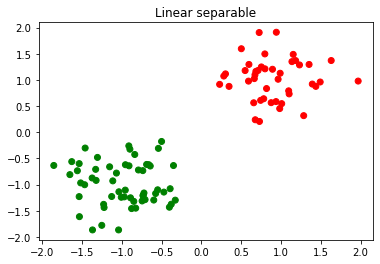

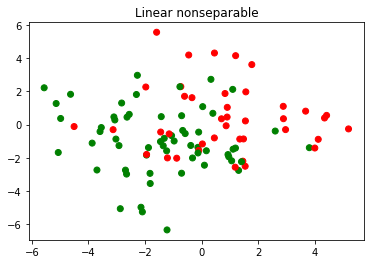

In [3]:
X,y = twoData(100, 2, 0.4)
mk = np.array(['r','g'])
plt.scatter(X[:,0],X[:,1],c=mk[y])
plt.title("Linear separable")
plt.show()

X,y = twoData(100, 2, 2)
mk = np.array(['r','g'])
plt.scatter(X[:,0],X[:,1],c=mk[y])
plt.title("Linear nonseparable")
plt.show()


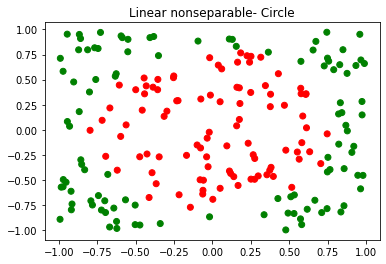

In [4]:
X,y = circle(200, 2)
mk = np.array(['r','g'])
plt.scatter(X[:,0],X[:,1],c=mk[y-1])
plt.title("Linear nonseparable- Circle")
plt.show()

In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

### Support Vector Machine on Linear Seperable Data

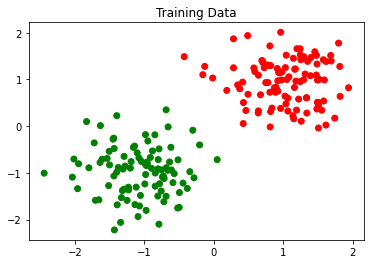

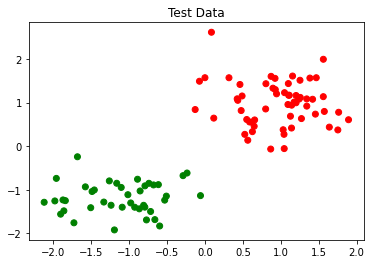

In [6]:
Xtrain, ytrain = twoData(200, 2, 0.5)
Xtest, ytest = twoData(100, 2, 0.5)

mk = np.array(['r','g'])

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=mk[ytrain])
plt.title("Training Data")
plt.show()

plt.scatter(Xtest[:,0],Xtest[:,1],c=mk[ytest])
plt.title("Test Data")
plt.show()

Train score: 1.0
Test score: 1.0


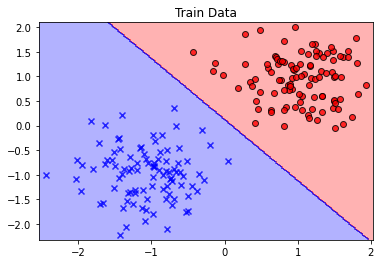

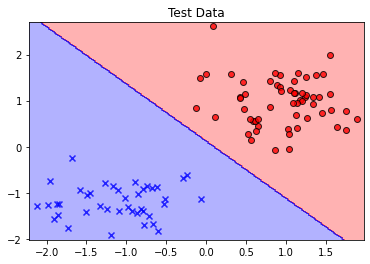

In [7]:
from sklearn.svm import SVC,LinearSVC

sv_model = SVC(kernel="linear", C=1.0, random_state=1)
sv_model.fit(Xtrain,ytrain)
print("Train score:",sv_model.score(Xtrain,ytrain))
print("Test score:",sv_model.score(Xtest,ytest))

plot_decision_regions(Xtrain,ytrain,classifier=sv_model)
plt.title("Train Data")
plt.show()
plot_decision_regions(Xtest,ytest,classifier=sv_model)
plt.title("Test Data")
plt.show()

Train score: 0.9030283510616048
Test score: 0.8989215453947339


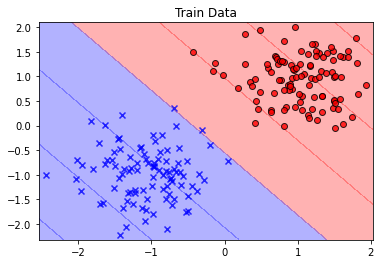

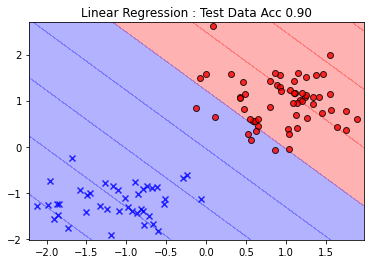

In [8]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(Xtrain,ytrain)
print("Train score:",lr_model.score(Xtrain,ytrain))
print("Test score:",lr_model.score(Xtest,ytest))

plot_decision_regions(Xtrain,ytrain,classifier=lr_model)
plt.title("Train Data")
plt.show()
plot_decision_regions(Xtest,ytest,classifier=lr_model)
plt.title("Linear Regression : Test Data Acc %.2f"%(lr_model.score(Xtest,ytest)))
plt.show()

Train score: 1.0
Test score: 1.0


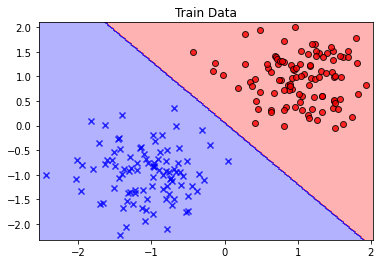

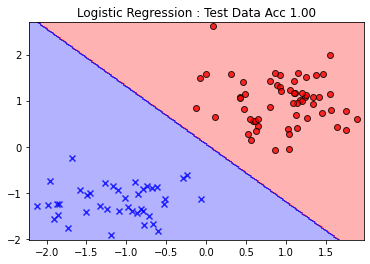

In [9]:
from sklearn.linear_model import SGDClassifier

lg_model = SGDClassifier(loss='log')
lg_model.fit(Xtrain,ytrain)
print("Train score:",lg_model.score(Xtrain,ytrain))
print("Test score:",lg_model.score(Xtest,ytest))

plot_decision_regions(Xtrain,ytrain,classifier=lg_model)
plt.title("Train Data")
plt.show()
plot_decision_regions(Xtest,ytest,classifier=lg_model)
plt.title("Logistic Regression : Test Data Acc %.2f"%(lg_model.score(Xtest,ytest)))
plt.show()

### Support Vector Machine on Linear Non-Seperable Data

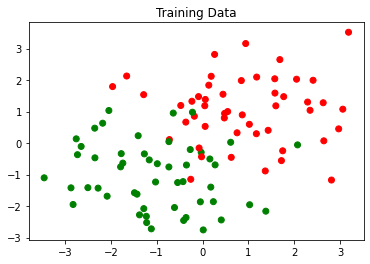

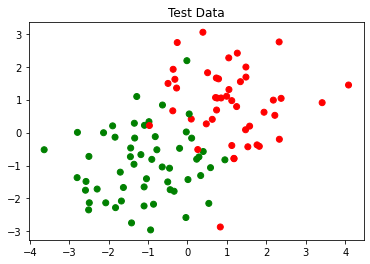

In [10]:
Xtrain, ytrain = twoData(100, 2, 1)
Xtest, ytest = twoData(100, 2, 1)

mk = np.array(['r','g'])

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=mk[ytrain])
plt.title("Training Data")
plt.show()

plt.scatter(Xtest[:,0],Xtest[:,1],c=mk[ytest])
plt.title("Test Data")
plt.show()

Train score: 0.92
Test score: 0.9


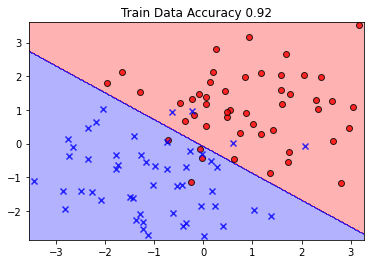

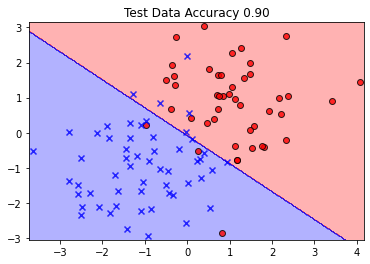

Train score: 0.6401848416046737
Test score: 0.6195102959217805


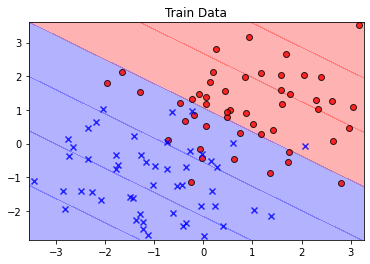

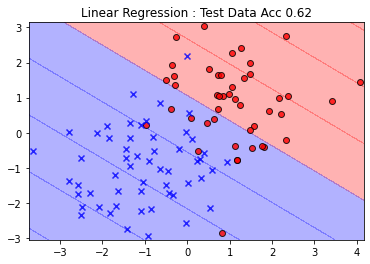

Train score: 0.91
Test score: 0.91


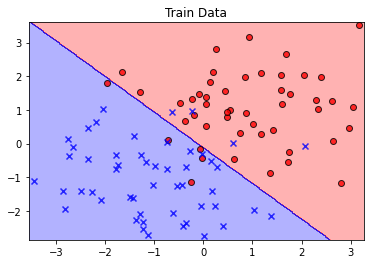

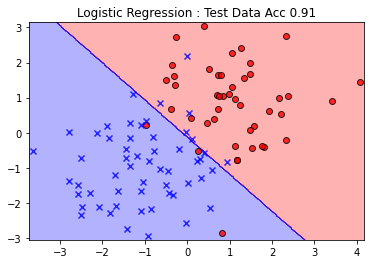

In [11]:
from sklearn.svm import SVC,LinearSVC

sv_model = SVC(kernel="linear", C=1.0, random_state=1)
sv_model.fit(Xtrain,ytrain)
print("Train score:",sv_model.score(Xtrain,ytrain))
print("Test score:",sv_model.score(Xtest,ytest))

plot_decision_regions(Xtrain,ytrain,classifier=sv_model)
plt.title("Train Data Accuracy %.2f"%(sv_model.score(Xtrain,ytrain)))
plt.show()
plot_decision_regions(Xtest,ytest,classifier=sv_model)
plt.title("Test Data Accuracy %.2f"%(sv_model.score(Xtest,ytest)))
plt.show()

lr_model = LinearRegression()
lr_model.fit(Xtrain,ytrain)
print("Train score:",lr_model.score(Xtrain,ytrain))
print("Test score:",lr_model.score(Xtest,ytest))

plot_decision_regions(Xtrain,ytrain,classifier=lr_model)
plt.title("Train Data")
plt.show()
plot_decision_regions(Xtest,ytest,classifier=lr_model)
plt.title("Linear Regression : Test Data Acc %.2f"%(lr_model.score(Xtest,ytest)))
plt.show()

lg_model = SGDClassifier(loss='log')
lg_model.fit(Xtrain,ytrain)
print("Train score:",lg_model.score(Xtrain,ytrain))
print("Test score:",lg_model.score(Xtest,ytest))

plot_decision_regions(Xtrain,ytrain,classifier=lg_model)
plt.title("Train Data")
plt.show()
plot_decision_regions(Xtest,ytest,classifier=lg_model)
plt.title("Logistic Regression : Test Data Acc %.2f"%(lg_model.score(Xtest,ytest)))
plt.show()

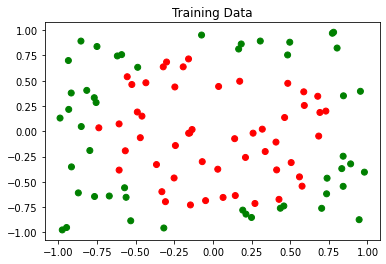

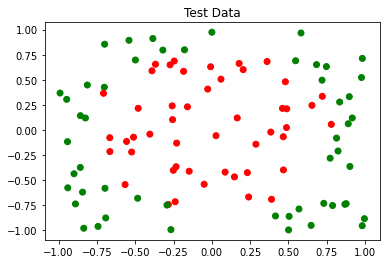

In [12]:
Xtrain, ytrain = circle(100, 2)
Xtest, ytest = circle(100, 2)

mk = np.array(['r','g'])

plt.scatter(Xtrain[:,0],Xtrain[:,1],c=mk[ytrain-1])
plt.title("Training Data")
plt.show()

plt.scatter(Xtest[:,0],Xtest[:,1],c=mk[ytest-1])
plt.title("Test Data")
plt.show()

Train score: 0.94
Test score: 0.93


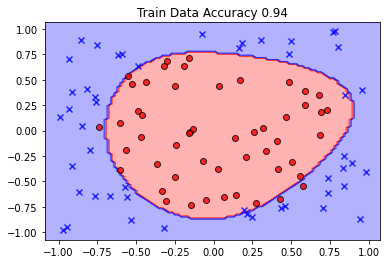

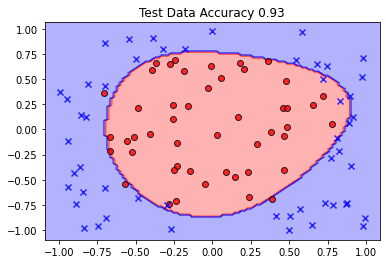

In [13]:
from sklearn.svm import SVC

sv_model = SVC(kernel="rbf", C=1.0, random_state=1)
sv_model.fit(Xtrain,ytrain)
print("Train score:",sv_model.score(Xtrain,ytrain))
print("Test score:",sv_model.score(Xtest,ytest))

plot_decision_regions(Xtrain,ytrain,classifier=sv_model)
plt.title("Train Data Accuracy %.2f"%(sv_model.score(Xtrain,ytrain)))
plt.show()
plot_decision_regions(Xtest,ytest,classifier=sv_model)
plt.title("Test Data Accuracy %.2f"%(sv_model.score(Xtest,ytest)))
plt.show()